
## About MovieLens Dataset
Context

The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. 


### Content

No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in six files.

tag.csv that contains tags applied to movies by users:

    userId

    movieId

    tag

    timestamp

rating.csv that contains ratings of movies by users:

    userId

    movieId

    rating

    timestamp

movie.csv that contains movie information:

    movieId

    title

    genres

link.csv that contains identifiers that can be used to link to other sources:

    movieId

    imdbId

    tmbdId

genome_scores.csv that contains movie-tag relevance data:

    movieId

    tagId

    relevance

genome_tags.csv that contains tag descriptions:

    tagId

    tag

### Overview
Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.




In [1]:
data_dir = "../data/raw/movielens-20m-dataset/"

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
sns.set_theme()

In [3]:
def generate_wordcloud(df, column):
    comment_words = ''
    # iterate through the csv file
    for val in df[column]:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

# 1. tags

Tags são marcados especificados por um usuário para um filme.

In [4]:
tag_df = pd.read_csv(data_dir + 'tag.csv')
tag_df.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [5]:
tags = tag_df.tag.unique()
tags

array(['Mark Waters', 'dark hero', 'noir thriller', ..., 'circle k',
       'This movie should have been called \\\\"How Cocaine Ruined Disney\\"\\""',
       'topless scene'], dtype=object)

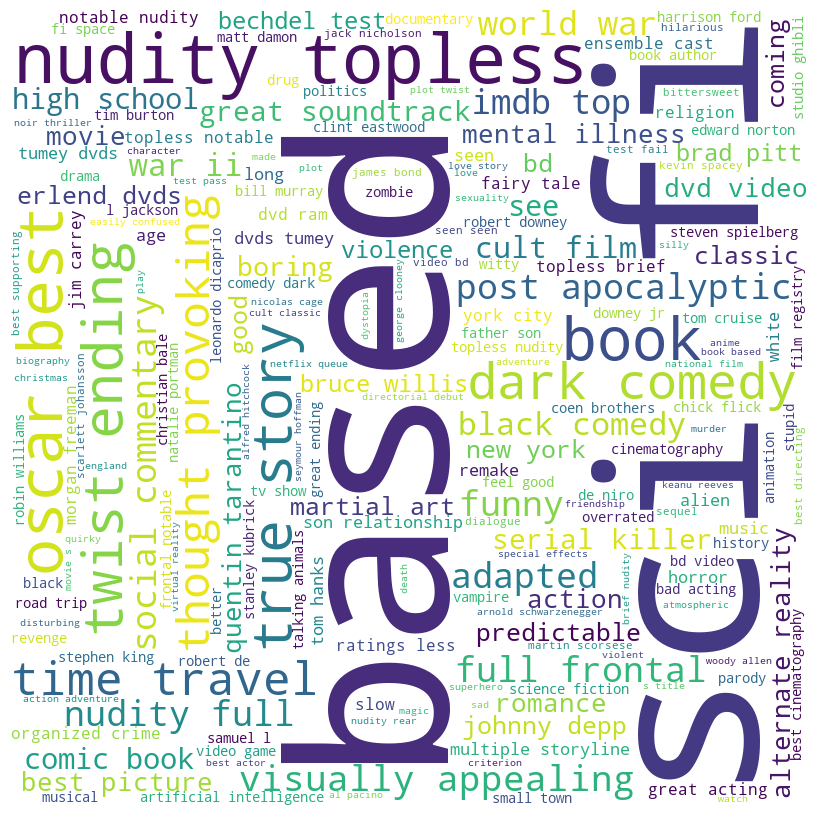

In [6]:
generate_wordcloud(tag_df, 'tag')

# 2. genome tags

The tag genome is a data structure that contains tag relevance scores for movies. The structure is a dense matrix: each movie in the genome has a value for every tag in the genome.

As described in the article "The Tag Genome: Encoding Community Knowledge to Support Novel Interaction", the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

In [7]:
genome_tags_df  = pd.read_csv(data_dir + 'genome_tags.csv')
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [8]:
genome_tags_df.shape

(1128, 2)

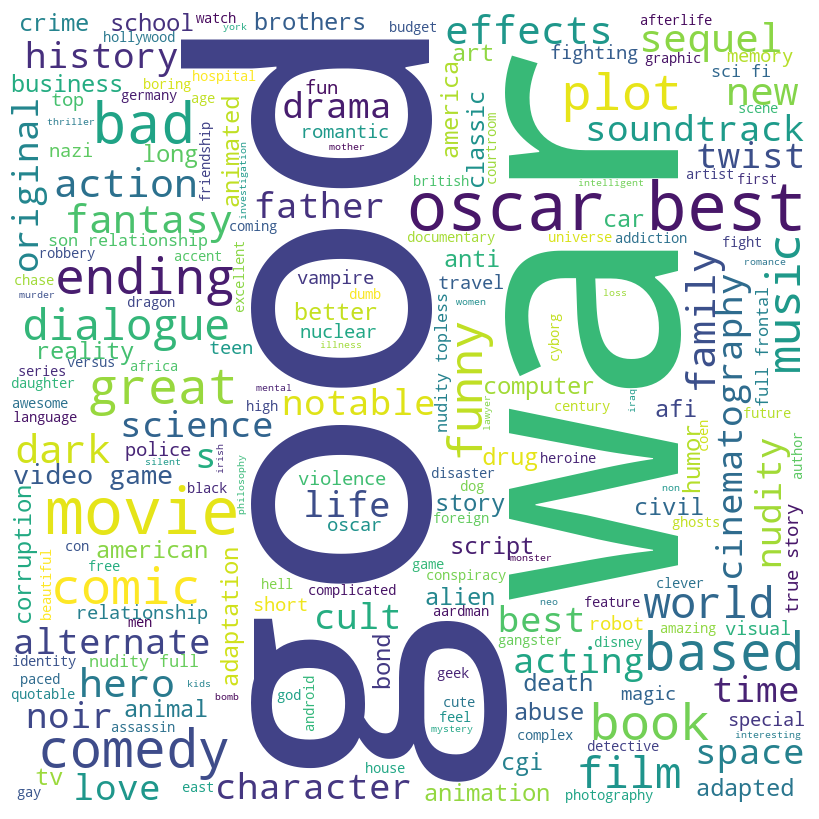

In [9]:
generate_wordcloud(genome_tags_df, 'tag')

Aqui, temos uma relação de relevância entre as tags e os filmes, mas não de um usuário específico. É como se fosse uma feature do filme.

# 3. ratings

Each line of this file after the header row represents one rating of one movie by one user. Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

In [10]:
rating_df = pd.read_csv(data_dir + 'rating.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [11]:
len(rating_df)

20000263

In [12]:
rating_df.rating.value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

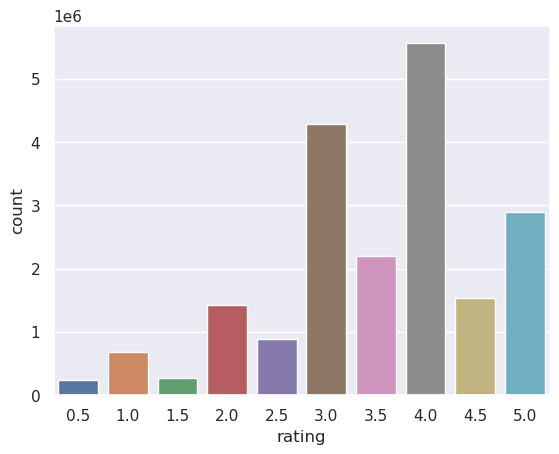

In [25]:
sns.countplot(x='rating', data=rating_df)

# 4. movies

Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL https://movielens.org/movies/1).

In [14]:
movies_df = pd.read_csv(data_dir + 'movie.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Seria legal criar uma tabela só para gêneros e separálos por id, também para entender quantos gêneros existem. No modelo, daria pra fazer One Hot Enconding nos gêneros.

In [15]:
print('Number of movies:', len(movies_df))

Number of movies: 27278


In [16]:
print('Unique titles:', movies_df.title.values.shape[0])

Unique titles: 27278


In [39]:
comment_words = ''
# iterate through the csv file
for val in movies_df['genres']:
    
    # typecaste each val to string
    val = str(val)
    print(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

Adventure|Animation|Children|Comedy|Fantasy
Adventure|Children|Fantasy
Comedy|Romance
Comedy|Drama|Romance
Comedy
Action|Crime|Thriller
Comedy|Romance
Adventure|Children
Action
Action|Adventure|Thriller
Comedy|Drama|Romance
Comedy|Horror
Adventure|Animation|Children
Drama
Action|Adventure|Romance
Crime|Drama
Drama|Romance
Comedy
Comedy
Action|Comedy|Crime|Drama|Thriller
Comedy|Crime|Thriller
Crime|Drama|Horror|Mystery|Thriller
Action|Crime|Thriller
Drama|Sci-Fi
Drama|Romance
Drama
Children|Drama
Drama|Romance
Adventure|Drama|Fantasy|Mystery|Sci-Fi
Crime|Drama
Drama
Mystery|Sci-Fi|Thriller
Adventure|Romance|IMAX
Children|Drama
Drama|Romance
Crime|Drama
Documentary|IMAX
Children|Comedy
Comedy|Romance
Drama
Drama|War
Action|Crime|Drama
Drama
Action|Adventure|Fantasy
Comedy|Drama|Thriller
Drama|Romance
Mystery|Thriller
Animation|Children|Drama|Musical|Romance
Drama|Romance
Crime|Mystery|Thriller
Action|Drama|Thriller
Comedy|Drama|Romance
Adventure|Drama
Children|Comedy
Drama
Adventure|Chil

In [40]:
comment_words = comment_words.replace('(no genres listed)', 'unknown')

In [45]:
genres = comment_words.replace('|',' ').replace(')','').replace('(','').replace('-','').strip().split(' ')
genres = np.unique(np.asarray(genres))
genres.shape[0]

20

In [46]:
genres

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'imax',
       'musical', 'mystery', 'romance', 'scifi', 'thriller', 'unknown',
       'war', 'western'], dtype='<U11')

In [47]:
genres_wc = ' '.join(map(str, genres))
genres_wc

'action adventure animation children comedy crime documentary drama fantasy filmnoir horror imax musical mystery romance scifi thriller unknown war western'

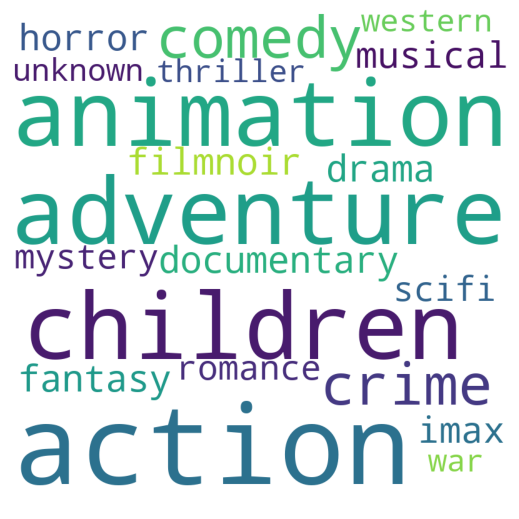

In [48]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                # stopwords = stopwords,
                min_font_size = 10).generate(genres_wc)

# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# 5. link

Identifiers that can be used to link to other sources of movie data

In [21]:
link_df = pd.read_csv(data_dir + 'link.csv')
link_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
